In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
import xgboost as xgb

## Preparing the dataset
Preparation:

- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [9]:
df = pd.read_csv('./car_fuel_efficiency.csv')

df.sample(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
5816,150,7.0,181.0,2348.494426,14.1,2014,Asia,Gasoline,Front-wheel drive,-1.0,18.211272
6883,150,2.0,143.0,2709.954399,14.9,2018,Asia,Gasoline,Front-wheel drive,1.0,16.306371
3691,240,2.0,238.0,2883.491696,13.7,2021,Asia,Diesel,All-wheel drive,0.0,17.038592
5701,200,2.0,131.0,2174.192315,18.2,2020,USA,Diesel,All-wheel drive,0.0,18.829223
1674,130,3.0,188.0,2584.186023,17.3,2018,Asia,Diesel,All-wheel drive,0.0,16.855549


In [10]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [11]:
df = df.fillna(0)

In [12]:
X_temp, X_test, y_temp, y_test = train_test_split(df.drop('fuel_efficiency_mpg', axis=1), df['fuel_efficiency_mpg'], test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

print(f'Train shape: {X_train.shape}')
print(f'Validation shape: {X_val.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (5822, 10)
Validation shape: (1941, 10)
Test shape: (1941, 10)


In [13]:
# Preprocessing Data

X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')
X_test_dict = X_test.to_dict(orient='records')

dv = DictVectorizer(sparse=True)
X_train_matrix = dv.fit_transform(X_train_dict)
X_val_matrix = dv.transform(X_val_dict)
X_test_matrix = dv.transform(X_test_dict)

# Question 1
Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

Train a model with max_depth=1.

In [14]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train_matrix, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


\print(export_text(model, feature_names=dv.get_feature_names_out()))

[Text(0.5, 0.75, 'vehicle_weight <= 3022.107\nsquared_error = 6.398\nsamples = 5822\nvalue = 14.994'),
 Text(0.25, 0.25, 'squared_error = 2.575\nsamples = 3034\nvalue = 16.882'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2.453\nsamples = 2788\nvalue = 12.938'),
 Text(0.625, 0.5, '  False')]

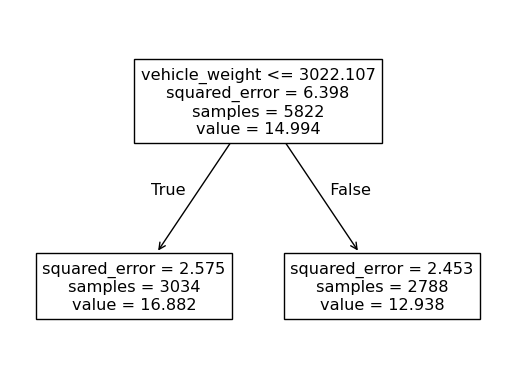

In [20]:
plot_tree(model, feature_names=dv.get_feature_names_out())

Answer: `vehicle_weight`

# Question 2
Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)
What's the RMSE of this model on the validation data?

In [26]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train_matrix, y_train)

y_val_pred = rfr.predict(X_val_matrix)
rmse = root_mean_squared_error(y_val, y_val_pred)
print(f'Validation RMSE: {rmse}')

Validation RMSE: 0.45957772230927263


# Question 3
Now let's experiment with the `n_estimators` parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

In [28]:
for n_estimators in range(10, 201, 10):
    rfr = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rfr.fit(X_train_matrix, y_train)

    y_val_pred = rfr.predict(X_val_matrix)
    rmse = root_mean_squared_error(y_val, y_val_pred)
    print(f'n_estimators: {n_estimators}, Validation RMSE: {round(rmse,3)}')

n_estimators: 10, Validation RMSE: 0.46
n_estimators: 20, Validation RMSE: 0.454
n_estimators: 30, Validation RMSE: 0.452
n_estimators: 40, Validation RMSE: 0.449
n_estimators: 50, Validation RMSE: 0.447
n_estimators: 60, Validation RMSE: 0.445
n_estimators: 70, Validation RMSE: 0.445
n_estimators: 80, Validation RMSE: 0.445
n_estimators: 90, Validation RMSE: 0.445
n_estimators: 100, Validation RMSE: 0.445
n_estimators: 110, Validation RMSE: 0.444
n_estimators: 120, Validation RMSE: 0.444
n_estimators: 130, Validation RMSE: 0.444
n_estimators: 140, Validation RMSE: 0.443
n_estimators: 150, Validation RMSE: 0.443
n_estimators: 160, Validation RMSE: 0.443
n_estimators: 170, Validation RMSE: 0.443
n_estimators: 180, Validation RMSE: 0.442
n_estimators: 190, Validation RMSE: 0.442
n_estimators: 200, Validation RMSE: 0.442


In [29]:
for n_estimators in range(10, 201, 10):
    rfr = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rfr.fit(X_train_matrix, y_train)

    y_val_pred = rfr.predict(X_val_matrix)
    rmse = root_mean_squared_error(y_val, y_val_pred)
    print(f'n_estimators: {n_estimators}, Validation RMSE: {round(rmse,2)}')

n_estimators: 10, Validation RMSE: 0.46
n_estimators: 20, Validation RMSE: 0.45
n_estimators: 30, Validation RMSE: 0.45
n_estimators: 40, Validation RMSE: 0.45
n_estimators: 50, Validation RMSE: 0.45
n_estimators: 60, Validation RMSE: 0.45
n_estimators: 70, Validation RMSE: 0.45
n_estimators: 80, Validation RMSE: 0.44
n_estimators: 90, Validation RMSE: 0.44
n_estimators: 100, Validation RMSE: 0.44
n_estimators: 110, Validation RMSE: 0.44
n_estimators: 120, Validation RMSE: 0.44
n_estimators: 130, Validation RMSE: 0.44
n_estimators: 140, Validation RMSE: 0.44
n_estimators: 150, Validation RMSE: 0.44
n_estimators: 160, Validation RMSE: 0.44
n_estimators: 170, Validation RMSE: 0.44
n_estimators: 180, Validation RMSE: 0.44
n_estimators: 190, Validation RMSE: 0.44
n_estimators: 200, Validation RMSE: 0.44


Question 4
Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
    - try different values of n_estimators from 10 till 200 (with step 10)
    - calculate the mean RMSE
- Fix the random seed: random_state=1
- What's the best max_depth, using the mean RMSE?


In [31]:
result = {
    'max_depth': [],
    'n_estimators': [],
    'rmse': []
}

for depth in [10,15,20,25]:
    for n_estimators in range(10, 201, 10):
        rfr = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=1, n_jobs=-1)
        rfr.fit(X_train_matrix, y_train)
    
        y_val_pred = rfr.predict(X_val_matrix)
        rmse = root_mean_squared_error(y_val, y_val_pred)
        print(f'max_depth: {depth}, n_estimators: {n_estimators}, Validation RMSE: {round(rmse,3)}')

        result['max_depth'].append(depth)
        result['n_estimators'].append(n_estimators)
        result['rmse'].append(rmse)


max_depth: 10, n_estimators: 10, Validation RMSE: 0.45
max_depth: 10, n_estimators: 20, Validation RMSE: 0.447
max_depth: 10, n_estimators: 30, Validation RMSE: 0.445
max_depth: 10, n_estimators: 40, Validation RMSE: 0.443
max_depth: 10, n_estimators: 50, Validation RMSE: 0.442
max_depth: 10, n_estimators: 60, Validation RMSE: 0.442
max_depth: 10, n_estimators: 70, Validation RMSE: 0.441
max_depth: 10, n_estimators: 80, Validation RMSE: 0.441
max_depth: 10, n_estimators: 90, Validation RMSE: 0.442
max_depth: 10, n_estimators: 100, Validation RMSE: 0.441
max_depth: 10, n_estimators: 110, Validation RMSE: 0.441
max_depth: 10, n_estimators: 120, Validation RMSE: 0.441
max_depth: 10, n_estimators: 130, Validation RMSE: 0.441
max_depth: 10, n_estimators: 140, Validation RMSE: 0.44
max_depth: 10, n_estimators: 150, Validation RMSE: 0.44
max_depth: 10, n_estimators: 160, Validation RMSE: 0.44
max_depth: 10, n_estimators: 170, Validation RMSE: 0.44
max_depth: 10, n_estimators: 180, Validation 

In [34]:
result_df = pd.DataFrame(result)

In [37]:
result_df.groupby('max_depth').agg({'rmse':'mean'}).round(3)

,rmse
max_depth,
10,0.442
15,0.445
20,0.446
25,0.446


# Question 5
We can extract feature importance information from tree-based models.  

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.  

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field.  

For this homework question, we'll find the most important feature:
- Train the model with these parameters:
    - n_estimators=10,
    - max_depth=20,
    - random_state=1,
    - n_jobs=-1 (optional)
- Get the feature importance information from this model


In [38]:
model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=1, n_jobs=8)

model.fit(X_train_matrix, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
feature_importances = model.feature_importances_
feature_names = dv.get_feature_names_out()

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

importance_df = importance_df.sort_values(by='importance', ascending=False)

In [41]:
print(importance_df)

                         feature  importance
13                vehicle_weight    0.959258
6                     horsepower    0.015972
0                   acceleration    0.011601
7                     model_year    0.003302
3            engine_displacement    0.003275
8                  num_cylinders    0.002232
9                      num_doors    0.001549
12                    origin=USA    0.000527
11                 origin=Europe    0.000479
10                   origin=Asia    0.000449
5             fuel_type=Gasoline    0.000349
4               fuel_type=Diesel    0.000339
1     drivetrain=All-wheel drive    0.000336
2   drivetrain=Front-wheel drive    0.000330


# Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:  

```python
    xgb_params = {
        'eta': 0.3, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
```
Now change eta from 0.3 to 0.1.

In [48]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [52]:
dtrain = xgb.DMatrix(X_train_matrix, label=y_train, feature_names=list(dv.get_feature_names_out()))
dval = xgb.DMatrix(X_val_matrix, label=y_val, feature_names=list(dv.get_feature_names_out()))

In [53]:
model = xgb.train(
    params=xgb_params,
    dtrain=dtrain
)

In [55]:
rmse = root_mean_squared_error(y_val, model.predict(dval))
print(f'Validation RMSE: {rmse}')

Validation RMSE: 0.44563950318601825


In [56]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [57]:
model = xgb.train(
    params=xgb_params,
    dtrain=dtrain
)

In [58]:
rmse = root_mean_squared_error(y_val, model.predict(dval))
print(f'Validation RMSE: {rmse}')

Validation RMSE: 1.0200885118810736


In [59]:
0.44563950318601825 < 1.0200885118810736

True